In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [36]:
#Read Data
df =pd.read_csv('Downloads/master.csv')

In [37]:
#Show fist 5 rows
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
#Show last 5 rows
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [6]:
#Describe function includes analysis of all our numerical data. For this, count, mean, std, min,% 25,% 50,% 75, max values are given.
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [16]:
# shape of the dataset
df.shape

(27820, 10)

In [26]:
#Total Suicide from 1985 - 2016
df.suicides_no.sum()

6748420

In [27]:
#Sum of Male and Female suicides 
df.groupby('sex').suicides_no.sum()

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

In [28]:
#Yearly comparison of male and male suicides all over the world
df.groupby(['year','sex']).suicides_no.sum().head(10)

year  sex   
1985  female     32479
      male       83584
1986  female     33852
      male       86818
1987  female     35006
      male       91836
1988  female     33015
      male       88011
1989  female     41361
      male      118883
Name: suicides_no, dtype: int64

In [30]:
#Age wise suicides of all Countries
df.groupby(['age']).sum().head(12)

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
age,,,,,
15-24 years,9289920,808542,8642946896,41532.69,78341054
25-34 years,9289920,1123912,8438103587,56571.52,78341054
35-54 years,9289920,2452141,14375888123,69386.02,78341054
5-14 years,9225408,52264,8398693237,2858.39,77519770
55-74 years,9289920,1658443,8803245340,74994.20,78341054
75+ years,9289920,653118,2663281253,111201.01,78341054


In [7]:
#Drop the columns not needed
df.drop(["HDI for year",'country-year'],inplace=True,axis=1)

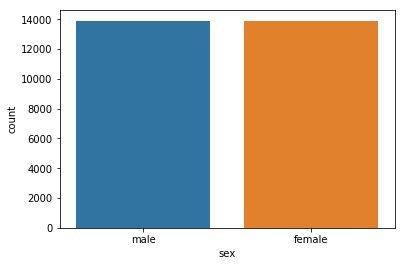

In [13]:
#The relationships between various features of the dataset
sns.countplot(df.sex)
plt.show()

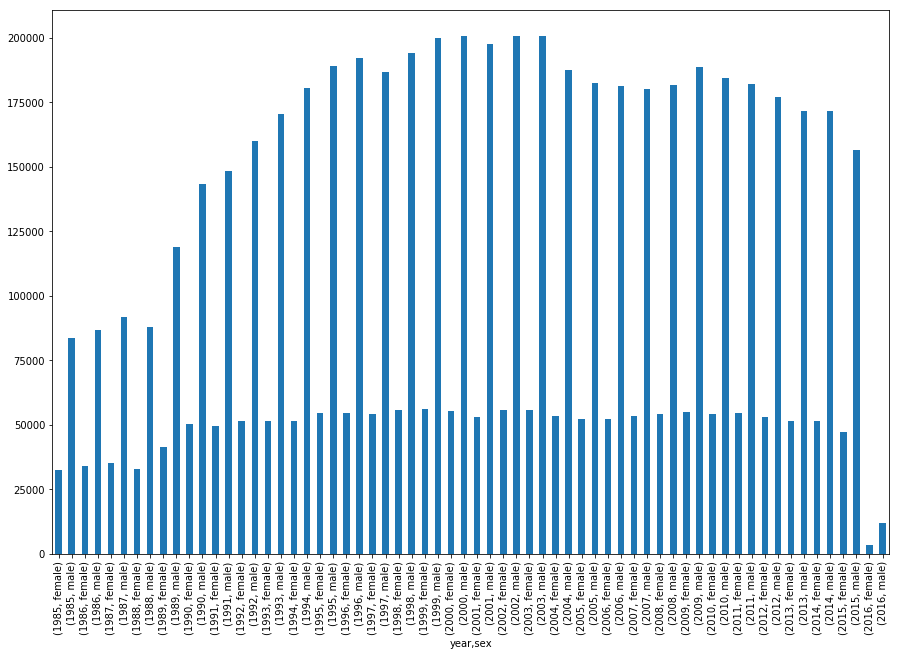

In [29]:
# Yearly plot of Male and Female Suicides
plt.figure(figsize=(15,10))
df.groupby(['year','sex']).suicides_no.sum().plot(kind = 'bar')

plt.show()

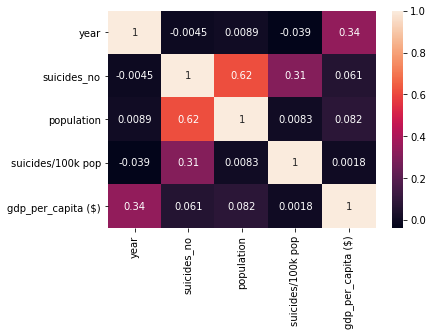

In [14]:
#The features in the dataset
_ = sns.heatmap(df.corr(), annot=True)

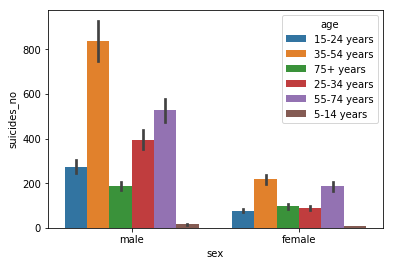

In [15]:
#The numbers of suicides commited by the people of different age groups across both the genders
p = sns.barplot(x='sex', y='suicides_no', hue='age', data=df)

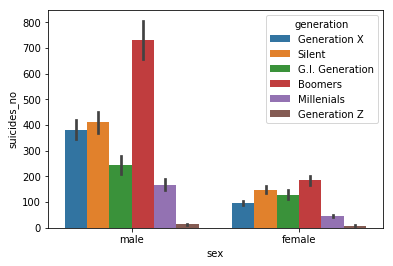

In [17]:
#The numbers of suicides commited by the people of different generations across both the genders
p = sns.barplot(x='sex', y='suicides_no', hue='generation', data=df)

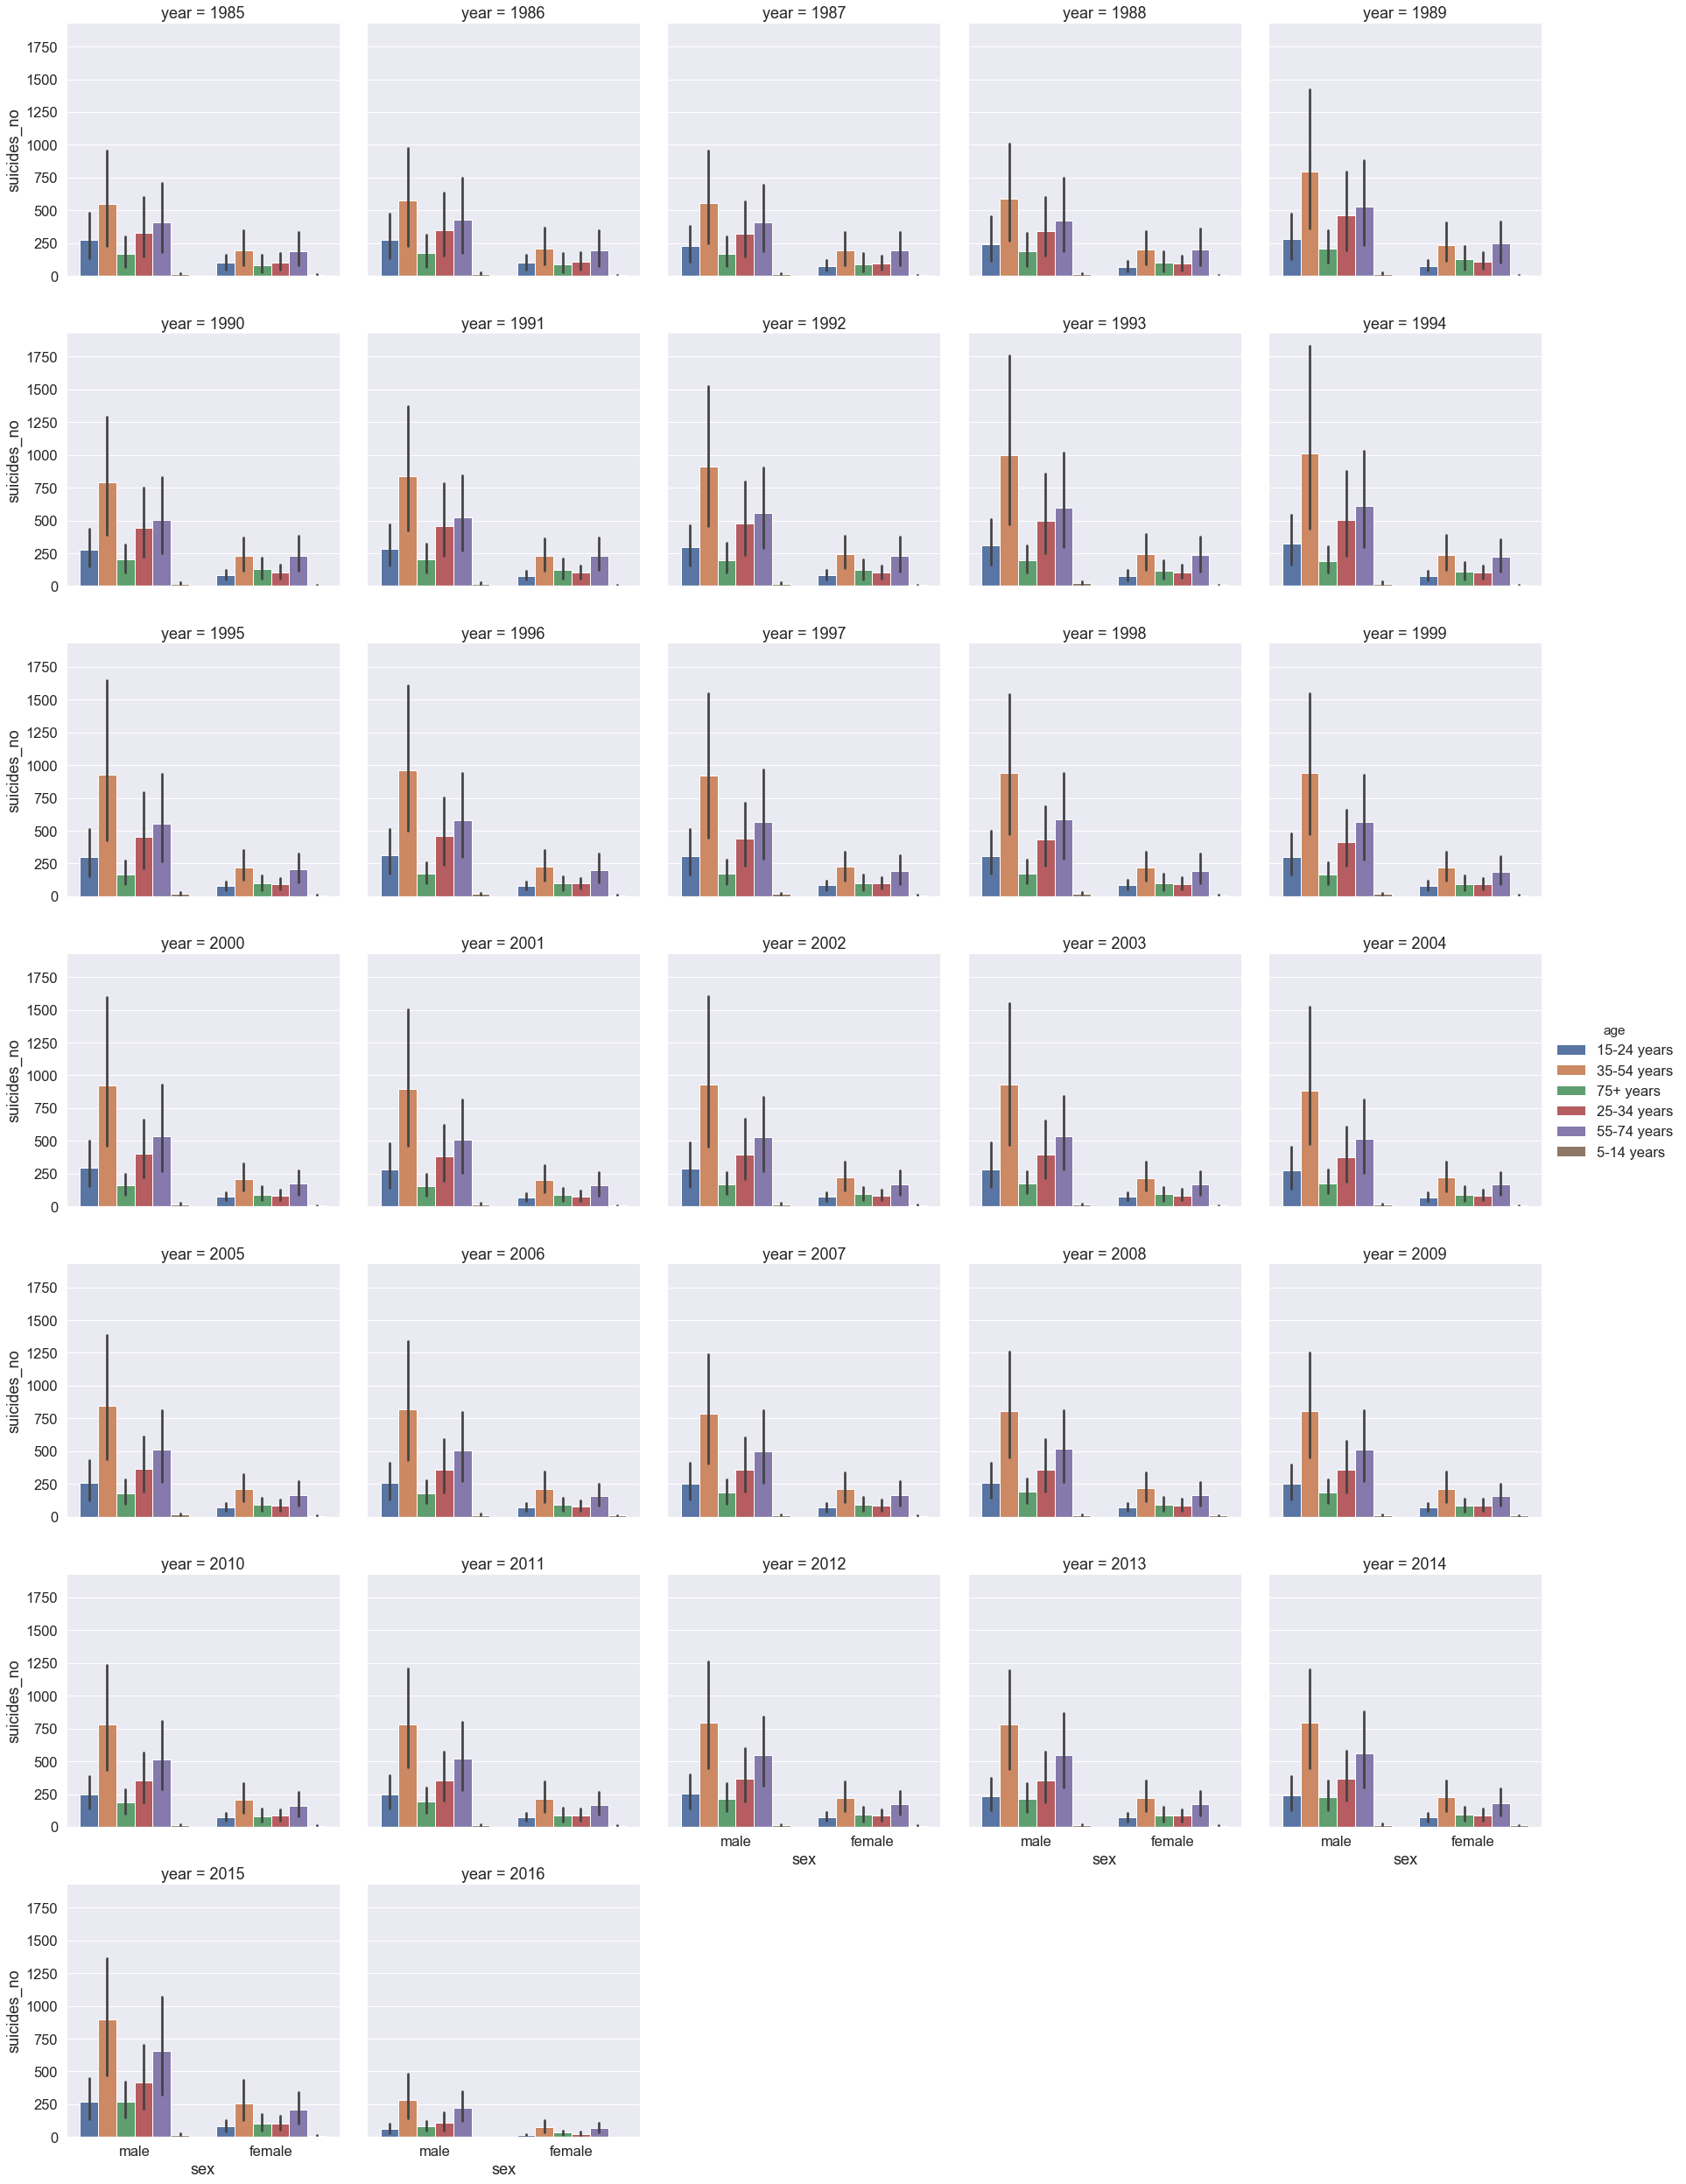

In [17]:
#the number of suicides for both males and females of different age groups for every year from 1985 to 2016
p = sns.catplot('sex','suicides_no',hue='age',col='year',data=df,kind='bar',col_wrap=5)

In [18]:
#The change in suicide numbers for people of different age groups for every year
age_15 = df.loc[df.loc[:, 'age']=='15-24 years',:]
age_35 = df.loc[df.loc[:, 'age']=='35-54 years',:]
age_75 = df.loc[df.loc[:, 'age']=='75+ years',:]
age_25 = df.loc[df.loc[:, 'age']=='25-34 years',:]
age_55 = df.loc[df.loc[:, 'age']=='55-74 years',:]
age_5 = df.loc[df.loc[:, 'age']=='5-14 years',:]

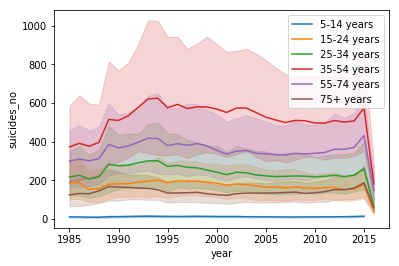

In [22]:
p = sns.lineplot(x='year', y='suicides_no', data=age_5)
q = sns.lineplot(x='year', y='suicides_no', data=age_15)
r = sns.lineplot(x='year', y='suicides_no', data=age_25)
s = sns.lineplot(x='year', y='suicides_no', data=age_35)
t = sns.lineplot(x='year', y='suicides_no', data=age_55)
t = sns.lineplot(x='year', y='suicides_no', data=age_75)

_ = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

In [23]:
#The change in suicide numbers for both male and female populations for each year
male_population = df.loc[df.loc[:, 'sex']=='male',:]
female_population = df.loc[df.loc[:, 'sex']=='female',:]

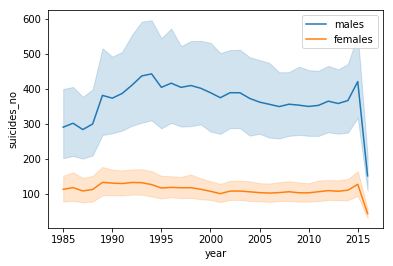

In [24]:
p = sns.lineplot(x='year', y='suicides_no', data=male_population)
q = sns.lineplot(x='year', y='suicides_no', data=female_population)

_ = plt.legend(['males', 'females'])

Text(0.5, 1.0, 'Suicides vs generations per year')

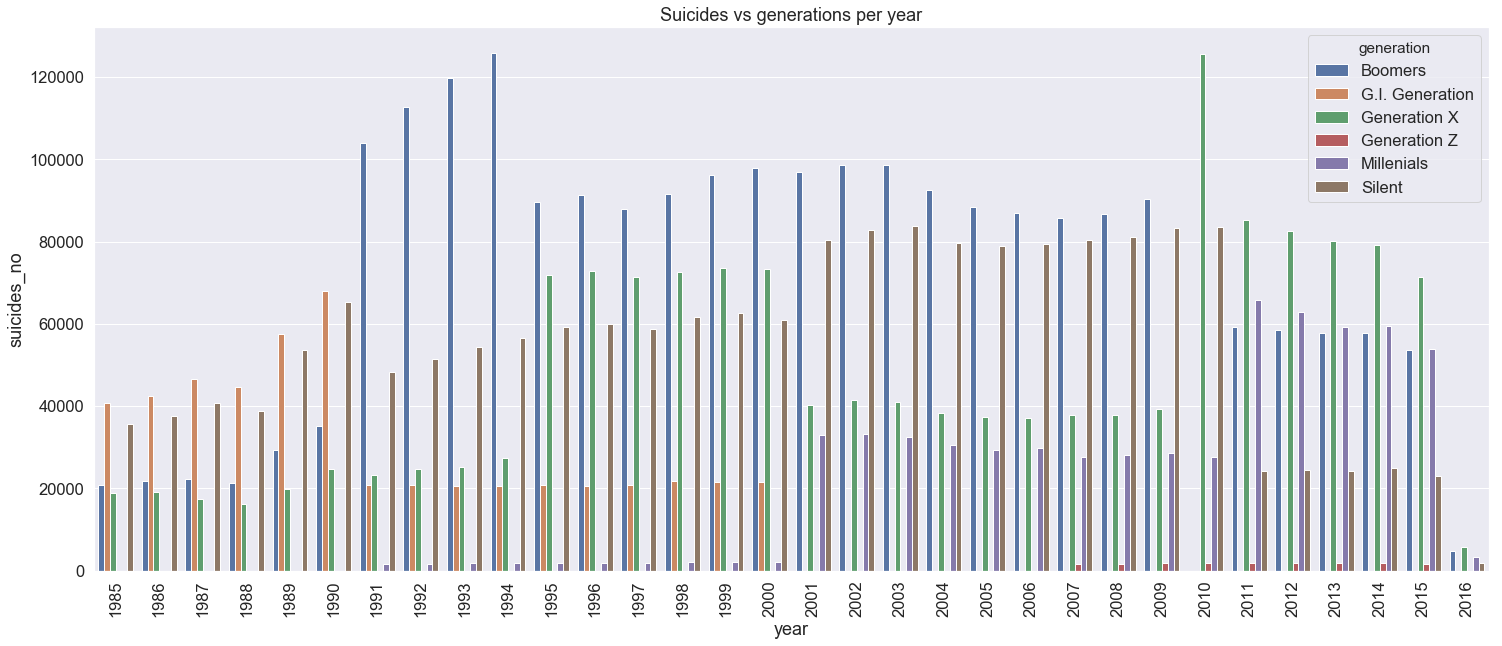

In [8]:
#Suicides vs generations per year
df = df[['suicides_no','generation','year']].groupby(['generation','year']).sum().reset_index()
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
sns.barplot(y='suicides_no', x='year', hue='generation', data=df, palette='deep').set_title('Suicides vs generations per year')

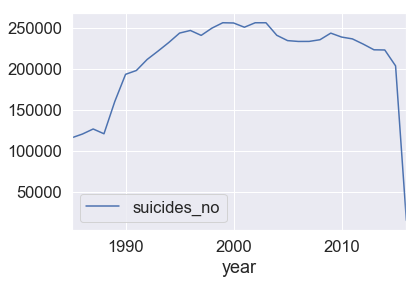

In [22]:
#Suicides by year distribution
df[['year','suicides_no']].groupby(['year']).sum().plot()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


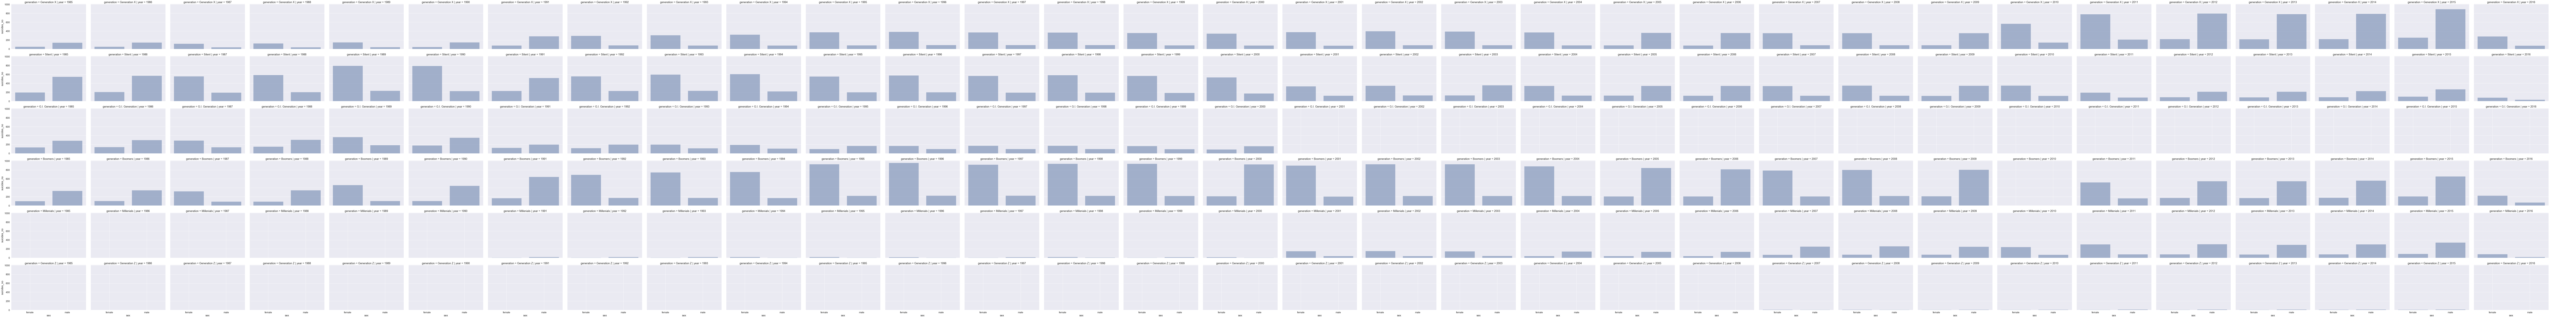

In [42]:
#Generation, Sex, Year
grid = sns.FacetGrid(df, row='generation', col='year', size = 5, aspect=1.5)
grid.map(sns.barplot, 'sex', 'suicides_no', alpha=.5, ci=None)
grid.add_legend()